In [1]:
#Importing libraries
import tensorflow as tf
from tensorflow.keras.layers import Layer
from tensorflow.keras.models import Sequential

In [2]:
#Defining a custom layer
class CustomDenseLayer(Layer):
  def __init__(self, units=32):
    super(CustomDenseLayer, self).__init__()
    self.units = units

  def build(self, input_shape):
    self.w = self.add_weight(shape=(input_shape[-1], self.units), initializer='random_normal', trainable=True)
    self.b = self.add_weight(shape=(self.units,), initializer='zeros', trainable=True)

  def call(self, inputs):
    return tf.nn.relu(tf.matmul(inputs, self.w)+self.b)

In [5]:
#Integrating the custom layer to the model
from tensorflow.keras.layers import Softmax
model = Sequential([
    CustomDenseLayer(128),
    CustomDenseLayer(10),
    Softmax()
])

In [6]:
#Compiling the model
model.compile(optimizer='adam', loss='categorical_crossentropy')

In [7]:
print('Model summary before building: ')
model.summary()

Model summary before building: 


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ custom_dense_layer_2                 │ ?                           │     0 (unbuilt) │
│ (CustomDenseLayer)                   │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ custom_dense_layer_3                 │ ?                           │     0 (unbuilt) │
│ (CustomDenseLayer)                   │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ softmax (Softmax)                    │ ?                           │               0 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 0 (0.00 B)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 0 (0.00 B)

In [8]:
model.build((1000, 20))

In [9]:
print('Model summary after building: ')
model.summary()

Model summary after building: 


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ custom_dense_layer_2                 │ (1000, 128)                 │           2,688 │
│ (CustomDenseLayer)                   │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ custom_dense_layer_3                 │ (1000, 10)                  │           1,290 │
│ (CustomDenseLayer)                   │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ softmax (Softmax)                    │ (1000, 10)                  │               0 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 3,978 (15.54 KB)

 Trainable params: 3,978 (15.54 KB)

 Non-trainable params: 0 (0.00 B)

In [10]:
#Training the model
import numpy as np

x_train = np.random.random((1000, 20))
y_train = np.random.randint(10, size=(1000, 1))

In [11]:
y_train = tf.keras.utils.to_categorical(y_train, num_classes=10)

In [12]:
model.fit(x_train, y_train, epochs=10, batch_size=32)

Epoch 1/10
32/32 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 2.2998
Epoch 2/10
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 2.2975
Epoch 3/10
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 2.2942
Epoch 4/10
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 2.2881
Epoch 5/10
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 2.2825 
Epoch 6/10
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 2.2872 
Epoch 7/10
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 2.2898 
Epoch 8/10
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 2.2860 
Epoch 9/10
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 2.2752
Epoch 10/10
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 2.2839 


In [13]:
#Evaluate the model
x_test = np.random.random((200, 20))
y_test = np.random.randint(10, size=(200, 1))

In [14]:
y_test = tf.keras.utils.to_categorical(y_test, num_classes=10)

In [15]:
loss = model.evaluate(x_test, y_test)

7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 2.3176  


In [16]:
print(loss)

2.3138997554779053


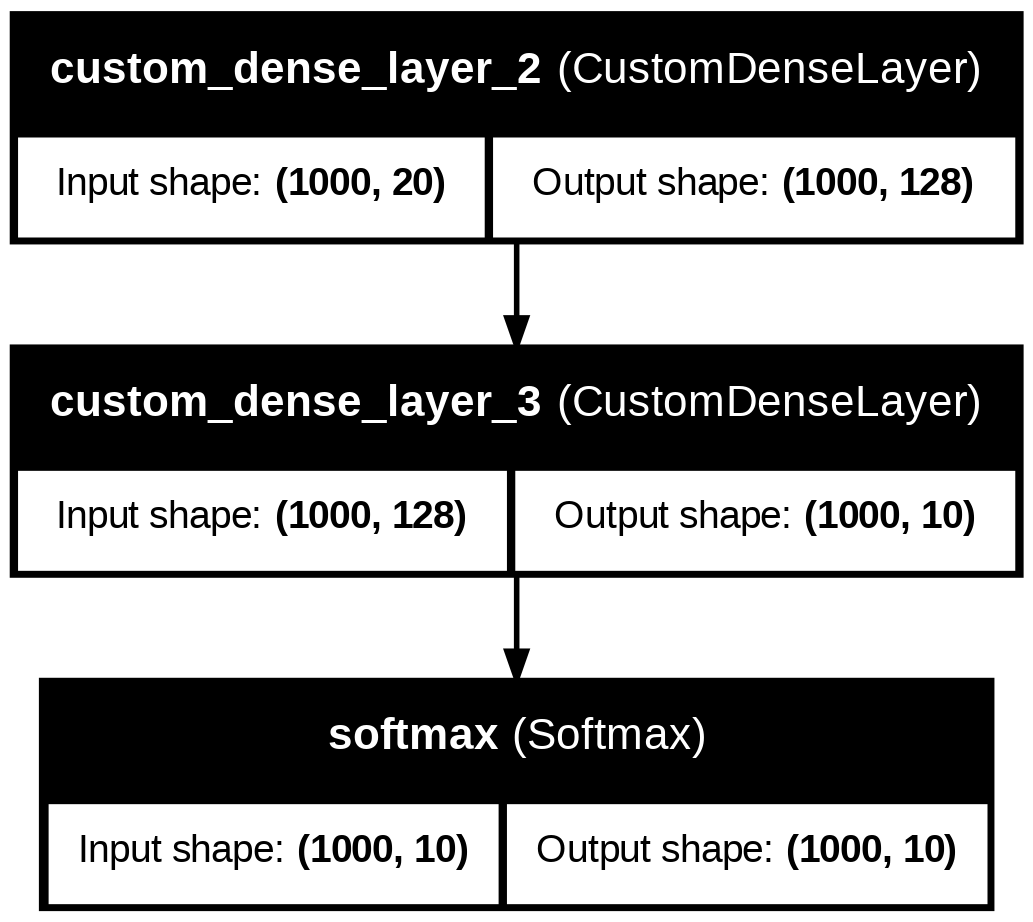

In [17]:
#Visualing the model
from tensorflow.keras.utils import plot_model
plot_model(model, to_file='model_architecture.png', show_shapes=True, show_layer_names=True)